In [105]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


c_limit = pd.read_csv("/data/python/limit pic(csv) 2.csv")
sn1987_x = c_limit.X1.to_numpy()
sn1987_y = c_limit.Y1.to_numpy()
rare_x = c_limit.X2.to_numpy()
rare_y = c_limit.Y2.to_numpy()
photon1_x = c_limit.X3.to_numpy()
photon1_y = c_limit.Y3.to_numpy()
photon2_x = c_limit.X4.to_numpy()
photon2_y = c_limit.Y4.to_numpy()


c2_limit = pd.read_csv("/data/python/PIC X2_X4.csv")
c2_rare_x = c2_limit.X2.to_numpy()
c2_rare_y = c2_limit.Y2.to_numpy()
c2_photon2_x = c2_limit.X4.to_numpy()
c2_photon2_y = c2_limit.Y4.to_numpy()

c3_limit = pd.read_csv("/data/python/phtonphobic.csv")
phobic_x = c3_limit.x1.to_numpy()
phobic_y = c3_limit.x2.to_numpy()

In [106]:
def sort_points(x, y):
    # 将x和y数组转换为DataFrame
    df = pd.DataFrame({'x': x, 'y': y})
    # log
    df_log = np.log10(df.dropna())
    sorted_df = pd.DataFrame(columns=['x', 'y'])  # 创建一个空的DataFrame来存储排序后的点
    current_df = df_log.copy()  # 复制一份df来操作
    x0 = y0 = 0  # 初始化x0和y0
    while len(current_df) > 0:
        if sorted_df.empty:  # for first point chose min x
            min_idx = current_df['x'].idxmin()
        else:
            distances = (current_df['x'] - x0) ** 2 + (current_df['y'] - y0) ** 2
            min_idx = distances.idxmin()
        x0, y0 = current_df.loc[min_idx, ['x', 'y']]
        sorted_df = pd.concat([sorted_df, current_df.loc[[min_idx]]], ignore_index=True)
        current_df.drop(min_idx, inplace=True)

    # inverse log
    sorted_df[['x', 'y']] = np.power(10, sorted_df[['x', 'y']])
    
    
    return sorted_df['x'].to_numpy(), sorted_df['y'].to_numpy()

s_sn1987_x, s_sn1987_y = sort_points(sn1987_x, sn1987_y)
s_rare_x,s_rare_y = sort_points(rare_x,rare_y)
s_photon1_x,s_photon1_y = sort_points(photon1_x,photon1_y)
s_photon2_x,s_photon2_y = sort_points(photon2_x,photon2_y)

c2_s_rare_x,c2_s_rare_y = sort_points(c2_rare_x,c2_rare_y)
c2_s_photon2_x,c2_s_photon2_y = sort_points(c2_photon2_x,c2_photon2_y)

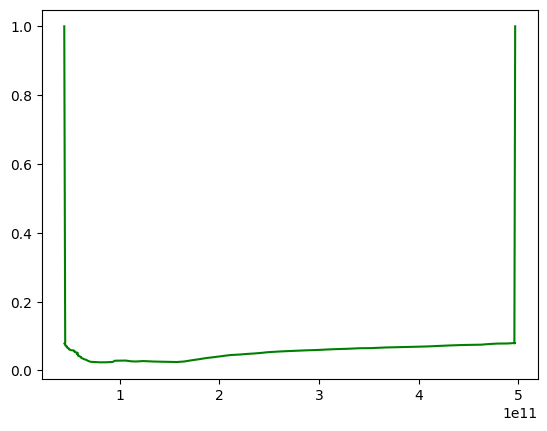

In [107]:
plt.plot(phobic_x,phobic_y, color = 'green')

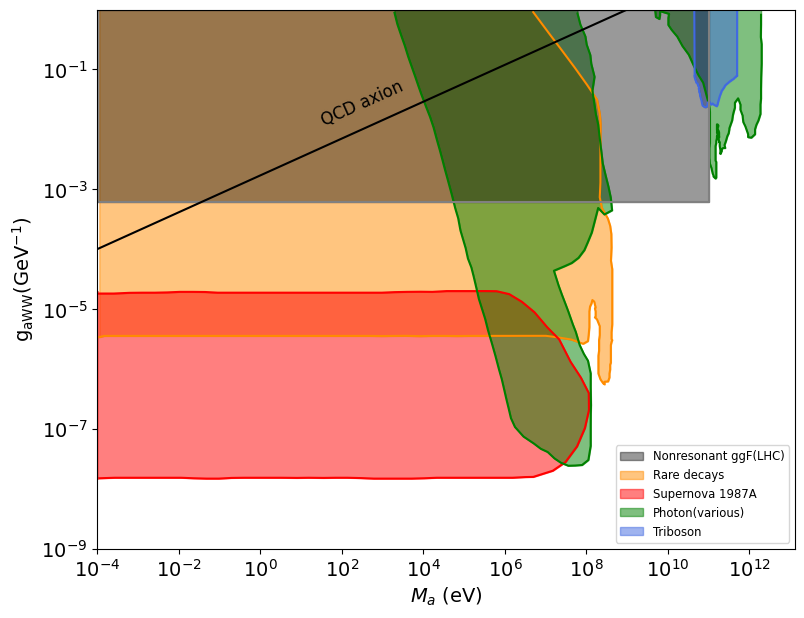

In [165]:
#s_sn1987 s_photon2 is ok 
from matplotlib.ticker import LogLocator

# Nonresonant ggF(LHC)
x = [1e-4, 1e-4, 1e11, 1e11, 1e-4]
y = [1, 0.62e-3, 0.62e-3, 1, 1] 


plt.figure(figsize=(9, 7))

##############################################################################################pic
plt.plot(s_rare_x,s_rare_y, color = 'darkorange')
plt.fill_between(s_rare_x, s_rare_y, 1, alpha=0.5, label="Rare decays", color = 'darkorange')


plt.plot(s_sn1987_x,s_sn1987_y, color = 'r')
# plt.fill_between(s_sn1987_x,0.0001, s_sn1987_y, where=(s_sn1987_x >= 0.0001), alpha=0.5, label="raredecay", color = 'r')
plt.fill_betweenx(s_sn1987_y, 0.0001, s_sn1987_x, alpha=0.5, label="Supernova 1987A", color = 'r')


plt.plot(s_photon1_x,s_photon1_y, color = 'green')
plt.fill_between(s_photon1_x, s_photon1_y, 1, alpha=0.5, label="Photon(various)", color = 'green')

plt.plot(s_photon2_x,s_photon2_y, color = 'green')
plt.fill_between(s_photon2_x, s_photon2_y, 1, alpha=0.5, color = 'green')

plt.plot(phobic_x,phobic_y, color = 'royalblue')
plt.fill_between(phobic_x, phobic_y, 1, alpha=0.5, label="Triboson", color = 'royalblue')

plt.fill(x, y, alpha=0.4, label='Nonresonant ggF(LHC)',color = 'black')
plt.plot(x, y, color='gray') 

##############################################################################################QCD axion

qcd_X = [10**9, 10**-3]
qcd_y = [1, 10**-3]

qcd_X_extended = [10**9, 10**-4] 
qcd_y_extended = [1, 10**-4] 

dx = np.log10(qcd_X_extended[1]) - np.log10(qcd_X_extended[0])
dy = np.log10(qcd_y_extended[1]) - np.log10(qcd_y_extended[0])
angle = np.degrees(np.arctan2(dy, dx)) 

x_text = 10**2.5  
y_text = 10**-2
plt.text(x_text, y_text, 'QCD axion', fontsize=12, rotation=angle+187, ha='center', va='bottom')

plt.plot(qcd_X_extended, qcd_y_extended,color = 'black')

##############################################################################################
plt.yscale('log')
plt.xscale('log')

plt.ylim(top=1,bottom=1e-9)
plt.xlim(left=1e-4)

plt.xlabel("$M_a$ (eV)", fontsize=14)
plt.ylabel("$\\rmg_{aWW} (GeV^{-1})$", fontsize=14)

plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)  


plt.legend(fontsize='small')
plt.show()

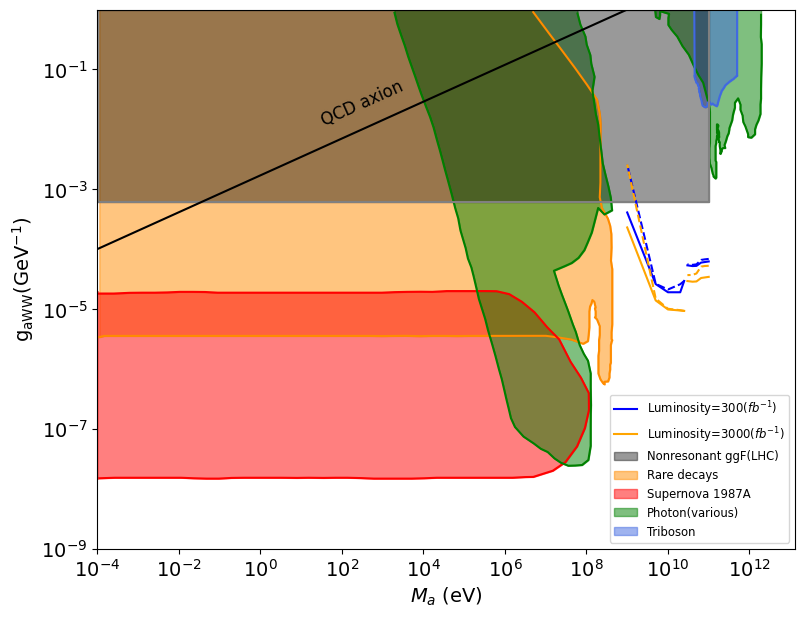

In [198]:
w_mass_large= [100, 80, 65, 50, 40, 30]
w_mass_large_ev = [x * 10**9 for x in w_mass_large]

g_aww_300_large = [6.212741782673705e-05, 6.073547582946208e-05, 5.947384211533281e-05, 5.2399724164063876e-05, 5.204141628433202e-05, 5.35007771707917e-05]
error_g_aww_300_large = [6.849307911139924e-05, 6.731830904567483e-05, 6.5849952049451e-05, 5.556664911369183e-05, 5.4533464773244286e-05, 5.5635948980260644e-05]
g_aww_3k_large = [3.435170842155201e-05, 3.360002350129941e-05, 3.289868346925823e-05, 2.8806993177223292e-05, 2.8523767180033515e-05, 2.924729212328804e-05]
error_g_aww_3k_large = [5.263369954949365e-05, 5.220997419136277e-05, 5.0979984658739006e-05, 3.915313593279911e-05, 3.703167606547523e-05, 3.674635971777937e-05]

w_mass_small= [25, 20, 10, 5, 1]
w_mass_small_ev = [x * 10**9 for x in w_mass_small]

g_aww_300_small = [2.935511998160502e-05, 1.9003032617690298e-05, 1.901194208035067e-05, 2.604369871201064e-05, 0.00040871535034202615]
error_g_aww_300_small = [2.935511998160502e-05, 2.588590129947998e-05, 2.1125025447006432e-05, 2.6336157197472704e-05, 0.0025887227953401413]
g_aww_3k_small = [9.282904012939194e-06, 9.429365429050203e-06, 9.805005409199312e-06, 1.3869327180069703e-05, 0.00022976794631030678]
error_g_aww_3k_small = [9.282904012939194e-06, 9.535252767202237e-06, 1.0077420254082522e-05, 1.4937493122193459e-05, 0.0025883108051699996]


plt.figure(figsize=(9, 7))

##############################################################################################pic
plt.plot(s_rare_x,s_rare_y, color = 'darkorange')
plt.fill_between(s_rare_x, s_rare_y, 1, alpha=0.5, label="Rare decays", color = 'darkorange')


plt.plot(s_sn1987_x,s_sn1987_y, color = 'r')
# plt.fill_between(s_sn1987_x,0.0001, s_sn1987_y, where=(s_sn1987_x >= 0.0001), alpha=0.5, label="raredecay", color = 'r')
plt.fill_betweenx(s_sn1987_y, 0.0001, s_sn1987_x, alpha=0.5, label="Supernova 1987A", color = 'r')


plt.plot(s_photon1_x,s_photon1_y, color = 'green')
plt.fill_between(s_photon1_x, s_photon1_y, 1, alpha=0.5, label="Photon(various)", color = 'green')

plt.plot(s_photon2_x,s_photon2_y, color = 'green')
plt.fill_between(s_photon2_x, s_photon2_y, 1, alpha=0.5, color = 'green')

plt.plot(phobic_x,phobic_y, color = 'royalblue')
plt.fill_between(phobic_x, phobic_y, 1, alpha=0.5, label="Triboson", color = 'royalblue')

plt.fill(x, y, alpha=0.4, label='Nonresonant ggF(LHC)',color = 'black')
plt.plot(x, y, color='gray') 

##############################################################################################QCD axion

dx = np.log10(qcd_X_extended[1]) - np.log10(qcd_X_extended[0])
dy = np.log10(qcd_y_extended[1]) - np.log10(qcd_y_extended[0])
angle = np.degrees(np.arctan2(dy, dx)) 

x_text = 10**2.5  
y_text = 10**-2
plt.text(x_text, y_text, 'QCD axion', fontsize=12, rotation=angle+187, ha='center', va='bottom')

plt.plot(qcd_X_extended, qcd_y_extended,color = 'black')

##############################################################################################
plt.plot(w_mass_large_ev, g_aww_300_large, label='Luminosity=300$(fb^{-1})$', color='blue')
plt.plot(w_mass_large_ev, error_g_aww_300_large, color='blue', linestyle='dashed')
plt.plot(w_mass_large_ev, g_aww_3k_large, label='Luminosity=3000$(fb^{-1})$', color='orange')
plt.plot(w_mass_large_ev, error_g_aww_3k_large, color='orange', linestyle='dashed')
plt.plot(w_mass_small_ev, g_aww_300_small, color='blue')
plt.plot(w_mass_small_ev, error_g_aww_300_small, color='blue', linestyle='dashed')
plt.plot(w_mass_small_ev, g_aww_3k_small, color='orange')
plt.plot(w_mass_small_ev, error_g_aww_3k_small, color='orange', linestyle='dashed')


##############################################################################################
plt.yscale('log')
plt.xscale('log')

plt.ylim(top=1,bottom=1e-9)
plt.xlim(left=1e-4)

plt.xlabel("$M_a$ (eV)", fontsize=14)
plt.ylabel("$\\rmg_{aWW} (GeV^{-1})$", fontsize=14)

plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)  


plt.legend(fontsize='small')
plt.show()

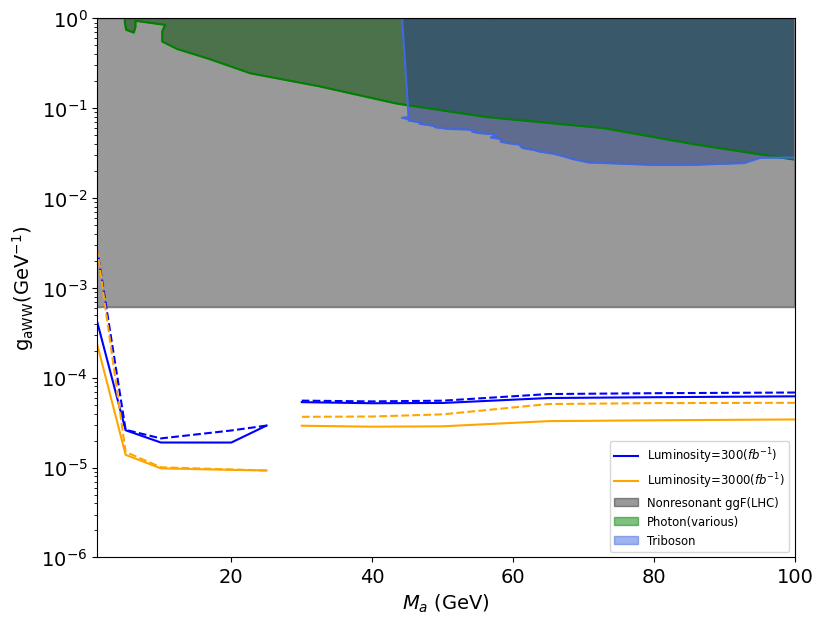

In [201]:
import matplotlib.ticker as ticker

plt.figure(figsize=(9, 7))

##############################################################################################pic

s_photon1_x_gev = [xi / 1e9 for xi in s_photon1_x]
s_photon2_x_gev = [xi / 1e9 for xi in s_photon2_x]
phobic_x_gev = [xi / 1e9 for xi in phobic_x]
x_gev = [xi / 1e9 for xi in x]

plt.plot(s_photon1_x_gev, s_photon1_y, color='green')
plt.fill_between(s_photon1_x_gev, s_photon1_y, 1, alpha=0.5, label="Photon(various)", color='green')

plt.plot(s_photon2_x_gev, s_photon2_y, color='green')
plt.fill_between(s_photon2_x_gev, s_photon2_y, 1, alpha=0.5, color='green')

plt.plot(phobic_x_gev, phobic_y, color='royalblue')
plt.fill_between(phobic_x_gev, phobic_y, 1, alpha=0.5, label="Triboson", color='royalblue')

plt.fill(x_gev, y, alpha=0.4, label='Nonresonant ggF(LHC)', color='black')
plt.plot(x_gev, y, color='gray')


##############################################################################################
plt.plot(w_mass_large, g_aww_300_large, label='Luminosity=300$(fb^{-1})$', color='blue')
plt.plot(w_mass_large, error_g_aww_300_large, color='blue', linestyle='dashed')
plt.plot(w_mass_large, g_aww_3k_large, label='Luminosity=3000$(fb^{-1})$', color='orange')
plt.plot(w_mass_large, error_g_aww_3k_large, color='orange', linestyle='dashed')
plt.plot(w_mass_small, g_aww_300_small, color='blue')
plt.plot(w_mass_small, error_g_aww_300_small, color='blue', linestyle='dashed')
plt.plot(w_mass_small, g_aww_3k_small, color='orange')
plt.plot(w_mass_small, error_g_aww_3k_small, color='orange', linestyle='dashed')


##############################################################################################


plt.yscale('log')

plt.ylim(top=1,bottom=1e-6)
plt.xlim(left=1,right=100)

plt.xlabel("$M_a$ (GeV)", fontsize=14)
plt.ylabel("$\\rmg_{aWW} (GeV^{-1})$", fontsize=14)

plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)  


plt.legend(fontsize='small')


plt.show()

In [22]:

import networkx as nx

def build_mst(x, y):

    G = nx.Graph()
    num_points = len(x)
    for i in range(num_points):
        for j in range(i + 1, num_points):
            distance = np.sqrt((x[i] - x[j])**2 + (y[i] - y[j])**2)
            G.add_edge(i, j, weight=distance)
    mst = nx.minimum_spanning_tree(G)
    return mst

def mst_dfs_order(mst, start=0):

    visited = set()
    order = []

    def dfs(v):
        visited.add(v)
        order.append(v)
        for u in sorted(mst.neighbors(v), key=lambda x: mst.edges[v, x]['weight']):
            if u not in visited:
                dfs(u)

    dfs(start)
    return order

def preprocess_coordinates(x, y):
    # 检查并移除NaN值
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]
    
    # 进一步检查是否有重复的点，并进行处理（此处简单地去除重复点，根据需要调整）
    unique_coords, indices = np.unique(np.vstack([x_clean, y_clean]).T, axis=0, return_index=True)
    x_unique = unique_coords[:, 0]
    y_unique = unique_coords[:, 1]
    
    return x_unique, y_unique

# 对rare和photon1数据进行预处理
rare_x_clean, rare_y_clean = preprocess_coordinates(rare_x, rare_y)
photon1_x_clean, photon1_y_clean = preprocess_coordinates(photon1_x, photon1_y)

# 接下来使用清理后的数据构建最小生成树
mst_rare = build_mst(rare_x_clean, rare_y_clean)
order_rare = mst_dfs_order(mst_rare)
mst_photon1 = build_mst(photon1_x_clean, photon1_y_clean)
order_photon1 = mst_dfs_order(mst_photon1)

# 现在可以按照这个顺序排序x和y坐标
sorted_rare_x = rare_x_clean[order_rare]
sorted_rare_y = rare_y_clean[order_rare]
sorted_photon1_x = photon1_x_clean[order_photon1]
sorted_photon1_y = photon1_y_clean[order_photon1]

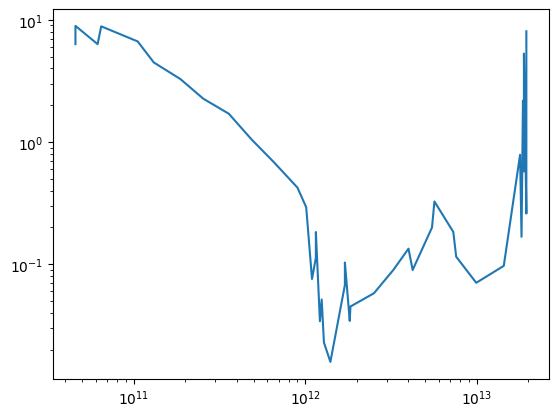

In [24]:

plt.plot(sorted_photon1_x,sorted_photon1_y)

plt.yscale('log')
plt.xscale('log')

XLRDError: Excel xlsx file; not supported